<a href="https://colab.research.google.com/github/hariprasad7/hari_INFO5731_Spring2021/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install tweepy

In [ ]:
#Pulling data from tweeter using tweepy
import json
import tweepy
import csv
import pandas as pd
import numpy as np
tweet_cred = dict()
tweet_cred['CONSUMER_KEY'] = 'u7L1lnR7HN85dn1qnTFO1cegb'
tweet_cred['CONSUMER_SECRET'] = 'QN1JrEmit2To46ZcwWAT4aI5QGWZXWRDDUPnMCWV5M66SFc8wT'
tweet_cred['ACCESS_KEY'] = '1144377060036620294-BSEicX3zH7hIhksbNZV9mrWFwa07cO'
tweet_cred['ACCESS_SECRET'] = 'gxWMOodDq1nQAjix9mHEOUSAtgE7XH5ctHInm0XRslJce'

with open('twitter_credentials.json', 'w') as info:
  json.dump(tweet_cred, info, indent=4, sort_keys=True)
with open('twitter_credentials.json') as cred_data:
  info = json.load(cred_data)
  consumer_key = info['CONSUMER_KEY']
  consumer_secret = info['CONSUMER_SECRET']
  access_key = info['ACCESS_KEY']
  access_secret = info['ACCESS_SECRET']
  auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  api1 = tweepy.API(auth)

final_tweettext=[]
def pull_tweets(hashtag,maximum_number_of_tweets_to_be_extracted):
  tweettext=[]
  for tweet in tweepy.Cursor(api1.search, q='#' + hashtag, rpp=100, lang="en", since='2020-10-05',until='2020-11-03' ).items(maximum_number_of_tweets_to_be_extracted):
    tweettext.append(tweet.text)
    final_tweettext.append(tweet.text)
  covid_tweets=pd.DataFrame({'tweets':tweettext})
  covid_tweets.to_csv('corona_vaccine.csv')
  print(covid_tweets[:])
  print('Extracted ' + str(len(covid_tweets)) + ' tweets with hashtag #' + hashtag + '\n')

l=int(input('Enter number of hashtags for which you want to extract the data: '))
i=0
for i in range(l):
  hashtag = input('Enter the hashtag you want to pull data- ')
  maximum_number_of_tweets_to_be_extracted = int(input('Enter the number of tweets that need to be extracted for hashtag #{}: '.format(hashtag)))
  pull_tweets(hashtag,maximum_number_of_tweets_to_be_extracted)
final_tweets=pd.DataFrame({'tweets':final_tweettext})
final_tweets.to_csv('tweets.csv')

In [15]:
#Data cleaning
final_tweets= pd.read_csv('tweets.csv')
#Removing special characters and punctuations
final_tweets['Special Characters removal']=final_tweets['tweets'].str.replace('[!-;:,<>./?@#$%^&*_~{}]','')
#Remove numbers
final_tweets['Remove numbers']=final_tweets['Special Characters removal'].str.replace('\d','')
#Stopwords removal
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop=stopwords.words('english')
final_tweets['Stopwords removal']=final_tweets['Remove numbers'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Lower casing
final_tweets['Lower casing']=final_tweets['Stopwords removal'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#stemming
from nltk.stem import PorterStemmer
st=PorterStemmer()
final_tweets['stemming']=final_tweets['Lower casing'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#Lemmatization
import nltk
from textblob import Word
nltk.download('wordnet')
final_tweets['Lemmatization']=final_tweets['stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
final_tweets.to_csv('tweets2.csv')
final_tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,tweets,Special Characters removal,Remove numbers,Stopwords removal,Lower casing,stemming,Lemmatization
0,0,RT @MaryannNgozika: Help trend this 😢\nHow man...,RT MaryannNgozika Help trend this 😢\nHow many ...,RT MaryannNgozika Help trend this 😢\nHow many ...,RT MaryannNgozika Help trend 😢 How many news m...,rt maryannngozika help trend 😢 how many news m...,rt maryannngozika help trend 😢 how mani news m...,rt maryannngozika help trend 😢 how mani news m...
1,1,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...
2,2,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...
3,3,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...
4,4,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...
...,...,...,...,...,...,...,...,...
4493,4493,RT @PatternPurveyor: @RonDesantis needs to be ...,RT PatternPurveyor RonDesantis needs to be awa...,RT PatternPurveyor RonDesantis needs to be awa...,RT PatternPurveyor RonDesantis needs aware nev...,rt patternpurveyor rondesantis needs aware nev...,rt patternpurveyor rondesanti need awar never ...,rt patternpurveyor rondesanti need awar never ...
4494,4494,"RT @BruceBourgoine: At this point, the differe...",RT BruceBourgoine At this point the difference...,RT BruceBourgoine At this point the difference...,RT BruceBourgoine At point difference effectiv...,rt brucebourgoine at point difference effectiv...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...
4495,4495,"RT @BruceBourgoine: At this point, the differe...",RT BruceBourgoine At this point the difference...,RT BruceBourgoine At this point the difference...,RT BruceBourgoine At point difference effectiv...,rt brucebourgoine at point difference effectiv...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...
4496,4496,RT @SuMoh7: Support✨Democrats Work For America...,RT SuMoh Support✨Democrats Work For America✨\n...,RT SuMoh Support✨Democrats Work For America✨\n...,RT SuMoh Support✨Democrats Work For America✨ 👉...,rt sumoh support✨democrats work for america✨ 👉...,rt sumoh support✨democrat work for america✨ 👉h...,rt sumoh support✨democrat work for america✨ 👉h...


In [16]:
#Removing Emojis
import re
import pandas as pd
def demoji(text):
	emoji_pattern = re.compile("["
		u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U00010000-\U0010ffff"
	                           "]+", flags=re.UNICODE)
	return(emoji_pattern.sub(r'', text))

data = pd.read_csv('tweets2.csv',encoding='utf-8')  #read csv file
 
data['Emoji_removal'] = data[u'Lemmatization'].astype(str)
data['Emoji_removal'] = data['Emoji_removal'].apply(lambda x:demoji(x))

data.to_csv('output.csv',index=False, encoding='utf-8')
data

,Unnamed: 0,Unnamed: 0.1,tweets,Special Characters removal,Remove numbers,Stopwords removal,Lower casing,stemming,Lemmatization,Emoji_removal
0,0,0,RT @MaryannNgozika: Help trend this 😢\nHow man...,RT MaryannNgozika Help trend this 😢\nHow many ...,RT MaryannNgozika Help trend this 😢\nHow many ...,RT MaryannNgozika Help trend 😢 How many news m...,rt maryannngozika help trend 😢 how many news m...,rt maryannngozika help trend 😢 how mani news m...,rt maryannngozika help trend 😢 how mani news m...,rt maryannngozika help trend how mani news me...
1,1,1,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...,rt soleimanyir i believ u govern dictatorship ...
2,2,2,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...,rt soleimanyir i believ u govern dictatorship ...
3,3,3,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...,rt soleimanyir i believ u govern dictatorship ...
4,4,4,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...,rt soleimanyir i believ u govern dictatorship ...
...,...,...,...,...,...,...,...,...,...,...
4493,4493,4493,RT @PatternPurveyor: @RonDesantis needs to be ...,RT PatternPurveyor RonDesantis needs to be awa...,RT PatternPurveyor RonDesantis needs to be awa...,RT PatternPurveyor RonDesantis needs aware nev...,rt patternpurveyor rondesantis needs aware nev...,rt patternpurveyor rondesanti need awar never ...,rt patternpurveyor rondesanti need awar never ...,rt patternpurveyor rondesanti need awar never ...
4494,4494,4494,"RT @BruceBourgoine: At this point, the differe...",RT BruceBourgoine At this point the difference...,RT BruceBourgoine At this point the difference...,RT BruceBourgoine At point difference effectiv...,rt brucebourgoine at point difference effectiv...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...
4495,4495,4495,"RT @BruceBourgoine: At this point, the differe...",RT BruceBourgoine At this point the difference...,RT BruceBourgoine At this point the difference...,RT BruceBourgoine At point difference effectiv...,rt brucebourgoine at point difference effectiv...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...
4496,4496,4496,RT @SuMoh7: Support✨Democrats Work For America...,RT SuMoh Support✨Democrats Work For America✨\n...,RT SuMoh Support✨Democrats Work For America✨\n...,RT SuMoh Support✨Democrats Work For America✨ 👉...,rt sumoh support✨democrats work for america✨ 👉...,rt sumoh support✨democrat work for america✨ 👉h...,rt sumoh support✨democrat work for america✨ 👉h...,rt sumoh supportdemocrat work for america http...


In [18]:
!pip3 install -U textblob

!python3 -m textblob.download_corpora

Requirement already up-to-date: textblob in /usr/local/lib/python3.7/dist-packages (0.15.3)
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [24]:
#Applying polarity for obtained tweets
from textblob import TextBlob
def getsubjectivityoftext(tweet):
  return TextBlob(tweet).sentiment.subjectivity

def getpolarityoftext(tweet):
  return TextBlob(tweet).sentiment.polarity

data['Subjectivity'] = data['Emoji_removal'].apply(getsubjectivityoftext)
data['Polarity'] = data['Emoji_removal'].apply(getpolarityoftext)

def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
      return 'Neutral'
  else:
    return 'Positive'

data['sentiment']=data['Polarity'].apply(getAnalysis)
data

,Unnamed: 0,Unnamed: 0.1,tweets,Special Characters removal,Remove numbers,Stopwords removal,Lower casing,stemming,Lemmatization,Emoji_removal,Subjectivity,Polarity,sentiment
0,0,0,RT @MaryannNgozika: Help trend this 😢\nHow man...,RT MaryannNgozika Help trend this 😢\nHow many ...,RT MaryannNgozika Help trend this 😢\nHow many ...,RT MaryannNgozika Help trend 😢 How many news m...,rt maryannngozika help trend 😢 how many news m...,rt maryannngozika help trend 😢 how mani news m...,rt maryannngozika help trend 😢 how mani news m...,rt maryannngozika help trend how mani news me...,0.0,0.000000,Neutral
1,1,1,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...,rt soleimanyir i believ u govern dictatorship ...,0.0,0.000000,Neutral
2,2,2,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...,rt soleimanyir i believ u govern dictatorship ...,0.0,0.000000,Neutral
3,3,3,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...,rt soleimanyir i believ u govern dictatorship ...,0.0,0.000000,Neutral
4,4,4,RT @soleimany_ir: I believe the #US government...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe the US government is ...,RT soleimanyir I believe US government dictato...,rt soleimanyir i believe us government dictato...,rt soleimanyir i believ us govern dictatorship...,rt soleimanyir i believ u govern dictatorship ...,rt soleimanyir i believ u govern dictatorship ...,0.0,0.000000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,4493,4493,RT @PatternPurveyor: @RonDesantis needs to be ...,RT PatternPurveyor RonDesantis needs to be awa...,RT PatternPurveyor RonDesantis needs to be awa...,RT PatternPurveyor RonDesantis needs aware nev...,rt patternpurveyor rondesantis needs aware nev...,rt patternpurveyor rondesanti need awar never ...,rt patternpurveyor rondesanti need awar never ...,rt patternpurveyor rondesanti need awar never ...,0.2,0.200000,Positive
4494,4494,4494,"RT @BruceBourgoine: At this point, the differe...",RT BruceBourgoine At this point the difference...,RT BruceBourgoine At this point the difference...,RT BruceBourgoine At point difference effectiv...,rt brucebourgoine at point difference effectiv...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...,0.5,0.136364,Positive
4495,4495,4495,"RT @BruceBourgoine: At this point, the differe...",RT BruceBourgoine At this point the difference...,RT BruceBourgoine At this point the difference...,RT BruceBourgoine At point difference effectiv...,rt brucebourgoine at point difference effectiv...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...,rt brucebourgoin at point differ effect peopl ...,0.5,0.136364,Positive
4496,4496,4496,RT @SuMoh7: Support✨Democrats Work For America...,RT SuMoh Support✨Democrats Work For America✨\n...,RT SuMoh Support✨Democrats Work For America✨\n...,RT SuMoh Support✨Democrats Work For America✨ 👉...,rt sumoh support✨democrats work for america✨ 👉...,rt sumoh support✨democrat work for america✨ 👉h...,rt sum

In [25]:
data.to_csv('polarity.csv')

In [28]:
#importing modules
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import vectorize
import pandas as pd
import spacy
import re

In [29]:
trump = pd.read_csv('dtrump_cleaneddata.csv')
biden = pd.read_csv('joe_cleaneddata.csv')

In [30]:
print(len(trump))
print(len(biden))

1193
972


In [31]:
print(trump.head(5))
print(biden.head(5))

   Unnamed: 0       created_at  ...                   country collected_at
0           2  10/15/2020 0:00  ...  United States of America      00:00.7
1           3  10/15/2020 0:00  ...                       NaN      00:01.1
2           4  10/15/2020 0:00  ...  United States of America      00:01.5
3           5  10/15/2020 0:00  ...  United States of America      00:01.9
4           7  10/15/2020 0:00  ...  United States of America      00:02.6

[5 rows x 6 columns]
   Unnamed: 0       created_at  ...                   country collected_at
0           1  10/15/2020 0:00  ...                       NaN      00:00.5
1           2  10/15/2020 0:00  ...  United States of America      00:01.0
2           3  10/15/2020 0:00  ...                       NaN      00:01.6
3           4  10/15/2020 0:00  ...  United States of America      00:02.1
4           5  10/15/2020 0:00  ...                       NaN      00:02.6

[5 rows x 6 columns]


In [33]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [34]:
nlp = spacy.load('en_core_web_lg')

In [35]:
stopwords = nlp.Defaults.stop_words
trump_cleaned_text = []
biden_cleaned_text = []
trump_lemma_text = []
biden_lemma_text = []
for item in trump['tweet']:
    item = re.sub(r'[^a-zA-Z0-9 -]', '', item)
    doc = nlp(item)
    text = [x.text for x in doc if x.text not in stopwords]
    lemmaText = [x.lemma_ for x in doc if x.text not in stopwords]
    trump_cleaned_text.append(' '.join(text))
    trump_lemma_text.append(" ".join(lemmaText))
for item in biden['tweet']:
    item = re.sub(r'[^a-zA-Z0-9 -]', '', item)
    doc = nlp(item)
    text = [x.text for x in doc if x.text not in stopwords]
    lemmaText = [x.lemma_ for x in doc if x.text not in stopwords]
    biden_cleaned_text.append(' '.join(text))
    biden_lemma_text.append(" ".join(lemmaText))

In [36]:
print(trump_cleaned_text[0])
print(biden_cleaned_text[0])

Trump As student I hear years years I heard China In 2019 And 15 nt know I asked said sir nt know But millions Like 300 millionUm What
HunterBiden HunterBidenEmails JoeBiden JoeBidenMustStepDown httpstco9enmxWvePm


In [37]:
print(trump_lemma_text[0])
print(biden_lemma_text[0])

Trump as student -PRON- hear year year -PRON- hear China in 2019 and 15 not know -PRON- ask say sir not know but million like 300 millionum what
HunterBiden hunterbidenemails JoeBiden joebidenmuststepdown httpstco9enmxwvepm


In [38]:
trump['cleanedText'] = trump_cleaned_text
trump['lemmatizedText'] = trump_lemma_text
biden['cleanedText'] = biden_cleaned_text
biden['lemmatizedText'] = biden_lemma_text

In [39]:
corpus = trump_lemma_text
corpus.extend(biden_lemma_text)
trump_df=pd.read_csv('dtrump_cleaneddata.csv')
trump_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at
0,2,10/15/2020 0:00,"#Trump: As a student I used to hear for years,...",snarke,United States of America,00:00.7
1,3,10/15/2020 0:00,2 hours since last tweet from #Trump! Maybe he...,Trumpytweeter,NaN,00:01.1
2,4,10/15/2020 0:00,You get a tie! And you get a tie! #Trump ‘s ra...,Rana Abtar - رنا أبتر,United States of America,00:01.5
3,5,10/15/2020 0:00,@CLady62 Her 15 minutes were over long time ag...,Farris Flagg,United States of America,00:01.9
4,7,10/15/2020 0:00,@DeeviousDenise @realDonaldTrump @nypost There...,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,United States of America,00:02.6
...,...,...,...,...,...,...
1188,1394,10/15/2020 1:29,Politics has become 100% corruption because go...,bitcoin,NaN,08:48.8
1189,1395,10/15/2020 1:29,#Trump #BidenTownHall #BidenHarris #Biden #Bur...,Cheryl,NaN,08:48.5
1190,1396,10/15/2020 1:29,@BrunoStagno And lets not forget... #MBS silen...,GryphonsPerch,NaN,08:49.2
1191,1398,10/15/2020 1:30,“U.S. President Donald #Trump noted that the W...,PanAm Post,United States of America,08:49.6


In [40]:
biden_df=pd.read_csv('joe_cleaneddata.csv')
biden_df


,Unnamed: 0,created_at,tweet,user_name,country,collected_at
0,1,10/15/2020 0:00,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,Cheri A. 🇺🇸,NaN,00:00.5
1,2,10/15/2020 0:00,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,Flag Waver,United States of America,00:01.0
2,3,10/15/2020 0:00,@chrislongview Watching and setting dvr. Let’s...,Michelle Ferg,NaN,00:01.6
3,4,10/15/2020 0:00,#censorship #HunterBiden #Biden #BidenEmails #...,the Gold State,United States of America,00:02.1
4,5,10/15/2020 0:00,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",Dose of Dissonance,NaN,00:02.6
...,...,...,...,...,...,...
967,1095,10/15/2020 1:11,"@eliascaress ""We are from Scranton, PA we will...",Parker,NaN,09:40.5
968,1096,10/15/2020 1:11,https://t.co/KkFtJxrMMb inside Joe Biden’s $4....,robert boyer,NaN,09:41.5
969,1097,10/15/2020 1:11,#HunterBiden #JoeBiden #Trump2020 \n#Electio...,Massive Dynamyx 🏴󠁧󠁢󠁥󠁮󠁧󠁿 ➐,NaN,09:41.0
970,1098,10/15/2020 1:11,GOT OUR MAIL-IN BALLOTS TODAY!!!\n\n#JoeBiden ...,g flores,NaN,09:42.0


In [43]:
#calculation of polarities for each tweet
def getsubjectivityoftext(tweet):
  return TextBlob(tweet).sentiment.subjectivity

def getpolarityoftext(tweet):
  return TextBlob(tweet).sentiment.polarity

In [44]:
trump_df['Subjectivity'] = trump_df['tweet'].apply(getsubjectivityoftext)
trump_df['Polarity'] = trump_df['tweet'].apply(getpolarityoftext)
trump_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at,Subjectivity,Polarity
0,2,10/15/2020 0:00,"#Trump: As a student I used to hear for years,...",snarke,United States of America,00:00.7,0.333333,0.333333
1,3,10/15/2020 0:00,2 hours since last tweet from #Trump! Maybe he...,Trumpytweeter,NaN,00:01.1,0.252222,0.076667
2,4,10/15/2020 0:00,You get a tie! And you get a tie! #Trump ‘s ra...,Rana Abtar - رنا أبتر,United States of America,00:01.5,0.000000,0.000000
3,5,10/15/2020 0:00,@CLady62 Her 15 minutes were over long time ag...,Farris Flagg,United States of America,00:01.9,0.416667,-0.155208
4,7,10/15/2020 0:00,@DeeviousDenise @realDonaldTrump @nypost There...,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,United States of America,00:02.6,0.523810,0.178571
...,...,...,...,...,...,...,...,...
1188,1394,10/15/2020 1:29,Politics has become 100% corruption because go...,bitcoin,NaN,08:48.8,0.100000,0.000000
1189,1395,10/15/2020 1:29,#Trump #BidenTownHall #BidenHarris #Biden #Bur...,Cheryl,NaN,08:48.5,0.000000,0.000000
1190,1396,10/15/2020 1:29,@BrunoStagno And lets not forget... #MBS silen...,GryphonsPerch,NaN,08:49.2,1.000000,-0.875000
1191,1398,10/15/2020 1:30,“U.S. President Donald #Trump noted that the W...,PanAm Post,United States of America,08:49.6,0.500000,0.000000


In [45]:
biden_df['Subjectivity'] = biden_df['tweet'].apply(getsubjectivityoftext)
biden_df['Polarity'] = biden_df['tweet'].apply(getpolarityoftext)
biden_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at,Subjectivity,Polarity
0,1,10/15/2020 0:00,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,Cheri A. 🇺🇸,NaN,00:00.5,0.000000,0.000000
1,2,10/15/2020 0:00,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,Flag Waver,United States of America,00:01.0,0.000000,0.000000
2,3,10/15/2020 0:00,@chrislongview Watching and setting dvr. Let’s...,Michelle Ferg,NaN,00:01.6,0.000000,0.000000
3,4,10/15/2020 0:00,#censorship #HunterBiden #Biden #BidenEmails #...,the Gold State,United States of America,00:02.1,0.000000,0.000000
4,5,10/15/2020 0:00,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",Dose of Dissonance,NaN,00:02.6,0.966667,0.039583
...,...,...,...,...,...,...,...,...
967,1095,10/15/2020 1:11,"@eliascaress ""We are from Scranton, PA we will...",Parker,NaN,09:40.5,0.535714,0.446429
968,1096,10/15/2020 1:11,https://t.co/KkFtJxrMMb inside Joe Biden’s $4....,robert boyer,NaN,09:41.5,0.291667,0.225000
969,1097,10/15/2020 1:11,#HunterBiden #JoeBiden #Trump2020 \n#Electio...,Massive Dynamyx 🏴󠁧󠁢󠁥󠁮󠁧󠁿 ➐,NaN,09:41.0,0.000000,0.000000
970,1098,10/15/2020 1:11,GOT OUR MAIL-IN BALLOTS TODAY!!!\n\n#JoeBiden ...,g flores,NaN,09:42.0,0.000000,0.000000


In [46]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
      return 'Neutral'
  else:
    return 'Positive'

trump_df['Analysis']= trump_df['Polarity'].apply(getAnalysis)
trump_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at,Subjectivity,Polarity,Analysis
0,2,10/15/2020 0:00,"#Trump: As a student I used to hear for years,...",snarke,United States of America,00:00.7,0.333333,0.333333,Positive
1,3,10/15/2020 0:00,2 hours since last tweet from #Trump! Maybe he...,Trumpytweeter,NaN,00:01.1,0.252222,0.076667,Positive
2,4,10/15/2020 0:00,You get a tie! And you get a tie! #Trump ‘s ra...,Rana Abtar - رنا أبتر,United States of America,00:01.5,0.000000,0.000000,Neutral
3,5,10/15/2020 0:00,@CLady62 Her 15 minutes were over long time ag...,Farris Flagg,United States of America,00:01.9,0.416667,-0.155208,Negative
4,7,10/15/2020 0:00,@DeeviousDenise @realDonaldTrump @nypost There...,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,United States of America,00:02.6,0.523810,0.178571,Positive
...,...,...,...,...,...,...,...,...,...
1188,1394,10/15/2020 1:29,Politics has become 100% corruption because go...,bitcoin,NaN,08:48.8,0.100000,0.000000,Neutral
1189,1395,10/15/2020 1:29,#Trump #BidenTownHall #BidenHarris #Biden #Bur...,Cheryl,NaN,08:48.5,0.000000,0.000000,Neutral
1190,1396,10/15/2020 1:29,@BrunoStagno And lets not forget... #MBS silen...,GryphonsPerch,NaN,08:49.2,1.000000,-0.875000,Negative
1191,1398,10/15/2020 1:30,“U.S. President Donald #Trump noted that the W...,PanAm Post,United States of America,08:49.6,0.500000,0.000000,Neutral


In [47]:
biden_df['Analysis']= biden_df['Polarity'].apply(getAnalysis)
biden_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at,Subjectivity,Polarity,Analysis
0,1,10/15/2020 0:00,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,Cheri A. 🇺🇸,NaN,00:00.5,0.000000,0.000000,Neutral
1,2,10/15/2020 0:00,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,Flag Waver,United States of America,00:01.0,0.000000,0.000000,Neutral
2,3,10/15/2020 0:00,@chrislongview Watching and setting dvr. Let’s...,Michelle Ferg,NaN,00:01.6,0.000000,0.000000,Neutral
3,4,10/15/2020 0:00,#censorship #HunterBiden #Biden #BidenEmails #...,the Gold State,United States of America,00:02.1,0.000000,0.000000,Neutral
4,5,10/15/2020 0:00,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",Dose of Dissonance,NaN,00:02.6,0.966667,0.039583,Positive
...,...,...,...,...,...,...,...,...,...
967,1095,10/15/2020 1:11,"@eliascaress ""We are from Scranton, PA we will...",Parker,NaN,09:40.5,0.535714,0.446429,Positive
968,1096,10/15/2020 1:11,https://t.co/KkFtJxrMMb inside Joe Biden’s $4....,robert boyer,NaN,09:41.5,0.291667,0.225000,Positive
969,1097,10/15/2020 1:11,#HunterBiden #JoeBiden #Trump2020 \n#Electio...,Massive Dynamyx 🏴󠁧󠁢󠁥󠁮󠁧󠁿 ➐,NaN,09:41.0,0.000000,0.000000,Neutral
970,1098,10/15/2020 1:11,GOT OUR MAIL-IN BALLOTS TODAY!!!\n\n#JoeBiden ...,g flores,NaN,09:42.0,0.000000,0.000000,Neutral


In [48]:
y = ['Trump']*len(trump)
y.extend(['Biden']*len(biden))

In [49]:
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(corpus)
column_names = vectorizer.get_feature_names()
X = pd.DataFrame(x.toarray())
X.columns = column_names
X.index = corpus
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1732
433
1732
433


In [50]:
svcModel = SVC()
svcModel.fit(x_train, y_train)
y_pred_svc = svcModel.predict(x_test)

gnbModel = GaussianNB()
gnbModel.fit(x_train, y_train)
y_pred_gnb = gnbModel.predict(x_test)

dtModel = DecisionTreeClassifier()
dtModel.fit(x_train, y_train)
y_pred_dt = dtModel.predict(x_test)

rfModel = RandomForestClassifier()
rfModel.fit(x_train, y_train)
y_pred_rf = rfModel.predict(x_test)

xgbModel = XGBRFClassifier()
xgbModel.fit(x_train, y_train)
y_pred_xgb = xgbModel.predict(x_test)

In [51]:
ac_svc = accuracy_score(y_test, y_pred_svc)
ac_gnb = accuracy_score(y_test, y_pred_gnb)
ac_dt = accuracy_score(y_test, y_pred_dt)
ac_rf = accuracy_score(y_test, y_pred_rf)
ac_xgb = accuracy_score(y_test, y_pred_xgb)
print(ac_svc)
print(ac_dt)
print(ac_gnb)
print(ac_rf)
print(ac_xgb)

0.8729792147806005
0.8429561200923787
0.6143187066974596
0.8729792147806005
0.8891454965357968


In [52]:
ps_svc = precision_score(y_test, y_pred_svc, pos_label='Biden')
ps_gnb = precision_score(y_test, y_pred_gnb, pos_label='Biden')
ps_dt = precision_score(y_test, y_pred_dt, pos_label='Biden')
ps_rf = precision_score(y_test, y_pred_rf, pos_label='Biden')
ps_xgb = precision_score(y_test, y_pred_xgb, pos_label='Biden')
print(ps_svc)
print(ps_dt)
print(ps_gnb)
print(ps_rf)
print(ps_xgb)

0.8932584269662921
0.8190954773869347
0.5598290598290598
0.8535353535353535
0.9060773480662984


In [53]:
rs_svc = recall_score(y_test, y_pred_svc, pos_label='Biden')
rs_gnb = recall_score(y_test, y_pred_gnb, pos_label='Biden')
rs_dt = recall_score(y_test, y_pred_dt, pos_label='Biden')
rs_rf = recall_score(y_test, y_pred_rf, pos_label='Biden')
rs_xgb = recall_score(y_test, y_pred_xgb, pos_label='Biden')
print(rs_svc)
print(rs_dt)
print(rs_gnb)
print(rs_rf)
print(rs_xgb)

0.8153846153846154
0.8358974358974359
0.6717948717948717
0.8666666666666667
0.841025641025641


In [ ]:
auc_svc = roc_auc_score(y_test, y_pred_svc)
auc_gnb = roc_auc_score(y_test, y_pred_gnb)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(auc_svc)
print(auc_dt)
print(auc_gnb)
print(auc_rf)
print(auc_xgb)

In [55]:
f1_svc = f1_score(y_test, y_pred_svc, pos_label='Biden')
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label='Biden')
f1_dt = f1_score(y_test, y_pred_dt, pos_label='Biden')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Biden')
f1_xgb = f1_score(y_test, y_pred_xgb, pos_label='Biden')
print(f1_svc)
print(f1_dt)
print(f1_gnb)
print(f1_rf)
print(f1_xgb)

0.8525469168900803
0.8274111675126904
0.6107226107226107
0.8600508905852418
0.8723404255319149


In [56]:
df = pd.DataFrame()
df['Models'] = ['Support Vector', 'Naive Bayes',
                'Decision Tree', 'Random Forest', 'Xgboost']
df['Accuracy'] = [ac_svc, ac_gnb, ac_dt, ac_rf, ac_xgb]
df['PrecisionScore'] = [ps_svc, ps_gnb, ps_dt, ps_rf, ps_xgb]
df['RecallScore'] = [rs_svc, rs_gnb, rs_dt, rs_rf, rs_xgb]
df['f1Score'] = [f1_svc, f1_gnb, f1_dt, f1_rf, f1_xgb]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


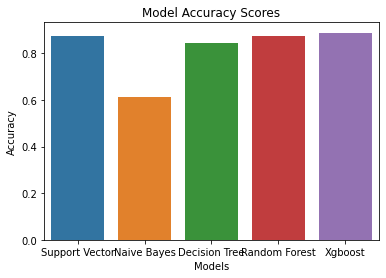

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


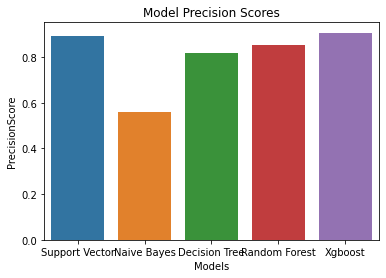

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


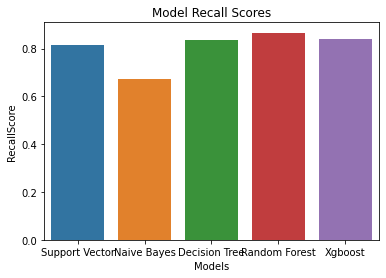

In [57]:
sns.barplot(df['Models'], df['Accuracy'])
plt.title('Model Accuracy Scores')
plt.show()
# %%
sns.barplot(df['Models'], df['PrecisionScore'])
plt.title('Model Precision Scores')
plt.show()
# %%
sns.barplot(df['Models'], df['RecallScore'])
plt.title('Model Recall Scores')
plt.show()

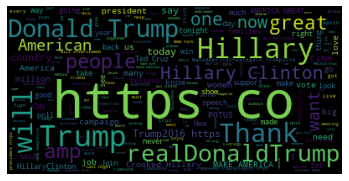

In [59]:
#Ploting frequently used word in US elections 2016 using Wordcloud
from wordcloud import WordCloud 
wordcloud2 = WordCloud().generate(' '.join(text2['text']))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

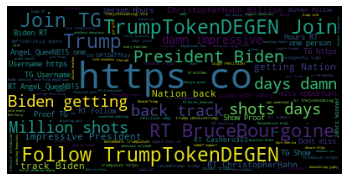

In [61]:
#Ploting frequently used word in US elections 2020 using Wordcloud
text2 = pd.read_csv('tweets.csv')
wordcloud3 = WordCloud().generate(' '.join(text2['tweets']))
# Generate plot
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()